Explanation of the Code for Image Clustering using LDA (Linear Discriminant Analysis)
The provided code is focused on clustering animal images based on features extracted from the images and using Linear Discriminant Analysis (LDA) for dimensionality reduction. Here's a step-by-step breakdown of the code:

In [ ]:
!curl -L -o archive.zip https://www.kaggle.com/api/v1/datasets/download/iamsouravbanerjee/animal-image-dataset-90-different-animals

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  656M  100  656M    0     0   105M      0  0:00:06  0:00:06 --:--:--  113M


In [ ]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: animals/animals/bison/73b10839bc.jpg  
  inflating: animals/animals/bison/74dc1dd32a.jpg  
  inflating: animals/animals/bison/75ab166a7d.jpg  
  inflating: animals/animals/bison/79e1610d01.jpg  
  inflating: animals/animals/bison/7ba5eee91f.jpg  
  inflating: animals/animals/bison/7d214aab4b.jpg  
  inflating: animals/animals/bison/7f2ef9ab03.jpg  
  inflating: animals/animals/bison/82ec723a4f.jpg  
  inflating: animals/animals/bison/85e145af6c.jpg  
  inflating: animals/animals/bison/862e2c6379.jpg  
  inflating: animals/animals/bison/87a5c700ad.jpg  
  inflating: animals/animals/bison/88b723ce90.jpg  
  inflating: animals/animals/bison/8c3af742c3.jpg  
  inflating: animals/animals/bison/8e34044b98.jpg  
  inflating: animals/animals/bison/8e6adbdc40.jpg  
  inflating: animals/animals/bison/8fce80d5ba.jpg  
  inflating: animals/animals/bison/961a895686.jpg  
  inflating: animals/animals/bison/984a5b583d.jpg  
  inflating: 

The path to the folder containing animal images is defined as animal_10_folder.
The animal_class_names specifies the subset of animal classes (bat, cat, cow, coyote) to load.
The number of samples per class (n_samples_per_animal) is set to 16 images.
Images will be resized to 224x224 pixels (image_size).

In [ ]:
import cv2
import os

# Define location of the animal-10 folder
animal_10_folder = "animals/animals"

# Define which and how many animals should be loaded
animal_class_names = ["bat", "cat", "cow", "coyote"] # Cat, Dog, Chicken, Cow
n_samples_per_animal = 16

#Define image size
image_size = (224, 224)

# Function for loading images
def load_animal_images(animal_folder, animal_classes, n_images_per_animal, resize):
  # Object for storing the images
  animals = {} # {Animal_name: image[]}
  #Go through each folder and download n_images
  for animal_class in animal_classes:
    animal_path = f"{animal_folder}/{animal_class}/"  # E.g. "Datasets/Animals/raw-img/gatto/"
    # Create a list to store the images
    animals[animal_class] = []
    # Go through n_images_per_animal
    for image_name in os.listdir(animal_path)[:n_images_per_animal]:
      # Load the image
      animal_image = cv2.imread(f"{animal_path}/{image_name}")
      # Resize to the same size
      animal_image_resized = cv2.resize(animal_image, resize, interpolation=cv2.INTER_AREA)
      # Add it to the animal's list of images
      animals[animal_class] += [animal_image_resized]
  return animals
animals_16imgs = load_animal_images(animal_10_folder, animal_class_names, n_samples_per_animal, image_size)


In [ ]:
animals_16imgs = load_animal_images(animal_10_folder, animal_class_names, n_samples_per_animal, image_size)


This part of the code visualizes the first image of each animal class using cv2_imshow in Colab (since cv2.imshow does not work in Colab).
cv2.waitKey(0) pauses the execution to display the image until a key is pressed.

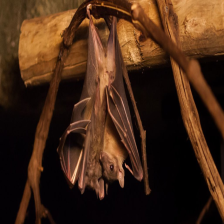

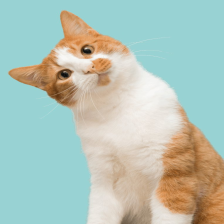

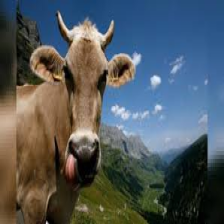

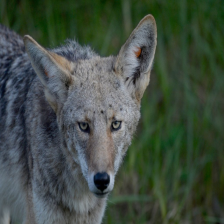

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow # Import cv2_imshow
# Go through each animals
for animal_name in animals_16imgs:
  # Load the first image for the animal
  animal_image = animals_16imgs[animal_name][0]
  # Show image using cv2_imshow
  cv2_imshow(animal_image) # Use cv2_imshow instead of cv2.imshow
  cv2.waitKey(0)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# create LDA that transforms data to 2D
lda = LDA(n_components = 2)

# Create a list of images and a list of animals they belong to
animal_images = []
animal_names = []
for animal_name, images in animals_16imgs.items():
    # Use flatten() to transforms the image to a vector
    animal_images += [image.flatten() for image in images]
    animal_names += [animal_name for _ in images]

# Fit the LDA so it can be used to transform the data to 2D
lda.fit(animal_images, animal_names)

# Function for transforming points to 2D
def transform_w_prefitted_lda(prefitted_lda, animals):
    # Transform the data to 2D
    transformed_animals = {}
    for animal_name, images in animals.items():
        animal_vectors = [image.flatten() for image in images]
        reduced_vectors = prefitted_lda.transform(animal_vectors)
        transformed_animals[animal_name] = reduced_vectors
    return transformed_animals

# Transform images
animals_16imgs_2D = transform_w_prefitted_lda(lda, animals_16imgs)


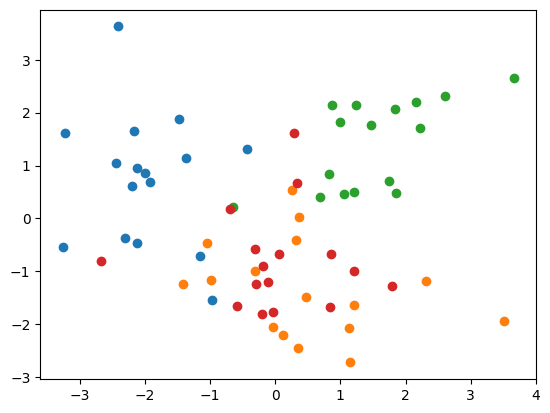

In [ ]:
from matplotlib import pyplot as plt

def visualize_2D_points(points):
    plt_figure = plt.figure()
    for vectors_2D in points.values():
        x = [vector[0] for vector in vectors_2D]
        y = [vector[1] for vector in vectors_2D]
        plt.plot(x, y, 'o')
    plt_figure.show()
    plt.show()

visualize_2D_points(animals_16imgs_2D)

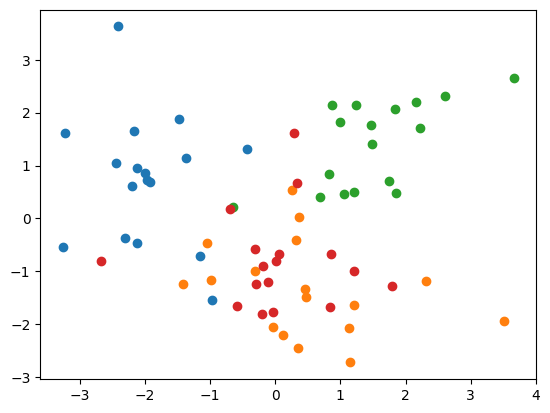

In [ ]:
import numpy

# Find center of each class
def find_class_centers(classes):
    centers = {}
    for name, vectors in classes.items():
        centers[name] = [numpy.mean([vector.flatten() for vector in vectors], axis=0)][0]
    return centers

centers_2D = find_class_centers(animals_16imgs_2D)

# Plot new graph with both the animals and centers
plt_figure = plt.figure()
for animal_name, vectors_2D in animals_16imgs_2D.items():
    x = [vector[0] for vector in vectors_2D] + [centers_2D[animal_name][0]]
    y = [vector[1] for vector in vectors_2D] + [centers_2D[animal_name][1]]
    plt.plot(x, y, 'o')
plt_figure.show()
plt.show()

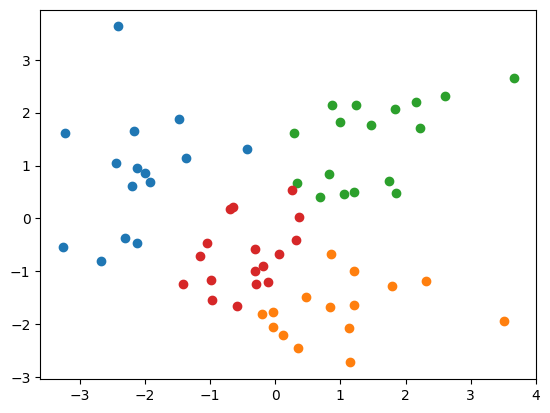

In [ ]:
# Function that distributes a list of points to the class closest to them
def distribute_points(class_centers, class_points):
  # Put all points into a single list
  points = [vector.flatten() for vectors in class_points.values() for vector in vectors]
  # Create an empty map to store the points in
  distributed_points = {center: numpy.empty((0,len(points[0]))) for center in class_centers }
  # Distribute points
  for point in points:
    #Calculate distance to each class
    distance_to_animal_classes = {}
    for animal_class, center_point in class_centers.items():
        distance_to_animal_classes[animal_class] = numpy.linalg.norm(center_point - numpy.transpose(point))
    #Find the closest class
    closest_animal_class = min(distance_to_animal_classes, key=lambda k : distance_to_animal_classes[k])
    # Add point to the closest class
    distributed_points[closest_animal_class] = numpy.append(distributed_points[closest_animal_class], [point], axis=0)
  return distributed_points


# Put points into the cluster they are closest to
redistributed_points_2D = distribute_points(centers_2D, animals_16imgs_2D)

# Visualize distribution points
visualize_2D_points(redistributed_points_2D)

In [ ]:
# Load 128 images for each animal
animals_all = load_animal_images(animal_10_folder, animal_class_names, 128, image_size)

#Transform points with the prefitted LDA
animals_all_2D = transform_w_prefitted_lda(lda, animals_all)

In [ ]:
def calculate_accuracy_redistributed(original_points, redistributed_points):
    clusters_accuracy = {}
    for cluster_name in original_points:
        original_cluster_points = set([tuple(point.flatten()) for point in original_points[cluster_name]])
        redistributed_cluster_points = set([tuple(point.flatten()) for point in redistributed_points[cluster_name]])

        #Find how many in the redistributed set is also in the original set
        true_positive = len(original_cluster_points.intersection(redistributed_cluster_points))
        false_positive = len(redistributed_cluster_points) - true_positive
        false_negative = len(original_cluster_points) - true_positive

        accuracy = {"precision": true_positive / (true_positive + false_positive),
                    "recall": true_positive / (true_positive + false_negative),
                    "metric": { "TP": true_positive,
                                "FP": false_positive,
                                "FN": false_negative}
        }
        clusters_accuracy[cluster_name] = accuracy

    return clusters_accuracy

# Distribute all points
redistributed_all_points_2D = distribute_points(centers_2D, animals_all_2D)

# Calculate Accuracy
performance_2D = calculate_accuracy_redistributed(animals_all_2D, redistributed_all_points_2D)

# Show Accuracy
def show_accuracy(name, performance_dict):
    print(name)
    for key, value in performance_dict.items():
        print(f"{key}: {value}")

show_accuracy("2D Points", performance_2D)

2D Points
bat: {'precision': 0.6440677966101694, 'recall': 0.6333333333333333, 'metric': {'TP': 38, 'FP': 21, 'FN': 22}}
cat: {'precision': 0.41509433962264153, 'recall': 0.36666666666666664, 'metric': {'TP': 22, 'FP': 31, 'FN': 38}}
cow: {'precision': 0.6451612903225806, 'recall': 0.6666666666666666, 'metric': {'TP': 40, 'FP': 22, 'FN': 20}}
coyote: {'precision': 0.3939393939393939, 'recall': 0.43333333333333335, 'metric': {'TP': 26, 'FP': 40, 'FN': 34}}


In [ ]:
# Find Cluster centers with 16 points
centers_allD = find_class_centers(animals_16imgs)
# Redistribute points to match the closest cluster
redistributed_points_allD = distribute_points(centers_allD, animals_all)
# Calculate accuracy
performance_allD = calculate_accuracy_redistributed(animals_all, redistributed_points_allD)
# Print accuracy
show_accuracy("All-D Points", performance_allD)

All-D Points
bat: {'precision': 0.4625, 'recall': 0.6166666666666667, 'metric': {'TP': 37, 'FP': 43, 'FN': 23}}
cat: {'precision': 0.41509433962264153, 'recall': 0.36666666666666664, 'metric': {'TP': 22, 'FP': 31, 'FN': 38}}
cow: {'precision': 0.5510204081632653, 'recall': 0.45, 'metric': {'TP': 27, 'FP': 22, 'FN': 33}}
coyote: {'precision': 0.43103448275862066, 'recall': 0.4166666666666667, 'metric': {'TP': 25, 'FP': 33, 'FN': 35}}


In [ ]:
# Transform to 3D
lda = LDA(n_components = 3)
lda.fit(animal_images, animal_names)
animals_3D = transform_w_prefitted_lda(lda, animals_all)

# Find Cluster centers with 16 points
centers_3D = find_class_centers(animals_3D)
# Redistribute points to match the closest cluster
redistributed_points_3D = distribute_points(centers_3D, animals_3D)
# Calculate accuracy
performance_3D = calculate_accuracy_redistributed(animals_3D, redistributed_points_3D)
# Print accuracy
show_accuracy("3D Points", performance_allD)

3D Points
bat: {'precision': 0.4625, 'recall': 0.6166666666666667, 'metric': {'TP': 37, 'FP': 43, 'FN': 23}}
cat: {'precision': 0.41509433962264153, 'recall': 0.36666666666666664, 'metric': {'TP': 22, 'FP': 31, 'FN': 38}}
cow: {'precision': 0.5510204081632653, 'recall': 0.45, 'metric': {'TP': 27, 'FP': 22, 'FN': 33}}
coyote: {'precision': 0.43103448275862066, 'recall': 0.4166666666666667, 'metric': {'TP': 25, 'FP': 33, 'FN': 35}}


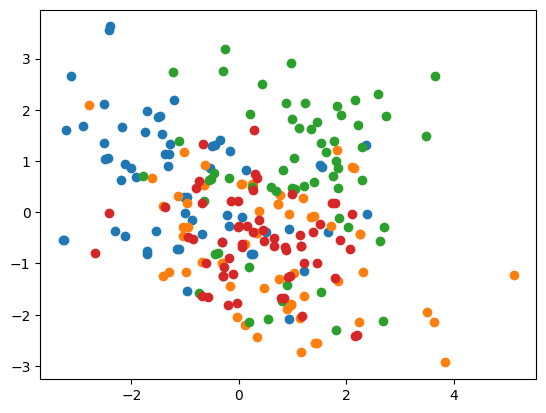

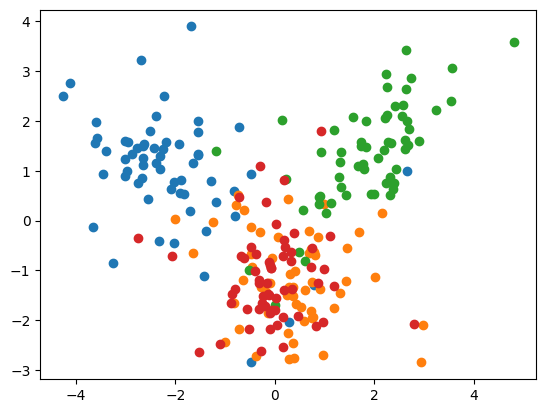

In [ ]:
# Create a new LDA
lda_128 = LDA(n_components = 2)

# Create a list of images and a list of animals they belong to
animal_images = []
animal_names = []
for animal_name, images in animals_all.items():
    # Use flatten() to transforms the image to a vector
    animal_images += [image.flatten() for image in images]
    animal_names += [animal_name for _ in images]

# Fit the LDA so it can be used to transform the data to 2D
lda_128.fit(animal_images, animal_names)
animals_2D_128 = transform_w_prefitted_lda(lda_128, animals_all)

# Plot Graphs
visualize_2D_points(animals_all_2D)
visualize_2D_points(animals_2D_128)

Conclusion:
The code demonstrates how to:

Load and preprocess animal image data.
Use LDA for dimensionality reduction to visualize the data in 2D and 3D.
Perform clustering by assigning points to the nearest class centers.
Evaluate the clustering results using precision and recall metrics